# Tensorflow Image Manipulation Tutorial

In [3]:
!wget https://www.travelanddestinations.com/wp-content/uploads/2019/01/Osaka-Japan-at-night.jpg

--2021-10-22 05:57:39--  https://www.travelanddestinations.com/wp-content/uploads/2019/01/Osaka-Japan-at-night.jpg
Resolving www.travelanddestinations.com (www.travelanddestinations.com)... 104.26.5.22, 172.67.71.152, 104.26.4.22, ...
Connecting to www.travelanddestinations.com (www.travelanddestinations.com)|104.26.5.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198892 (194K) [image/jpeg]
Saving to: ‘Osaka-Japan-at-night.jpg’

Osaka-Japan-at-nigh 100%[===================>] 194.23K  --.-KB/s    in 0.002s  

2021-10-22 05:57:39 (87.5 MB/s) - ‘Osaka-Japan-at-night.jpg’ saved [198892/198892]



In [238]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
import tensorflow as tf
img= tf.keras.utils.load_img(
    'Osaka-Japan-at-night.jpg', grayscale=False, color_mode='rgb', target_size=None,
    interpolation='nearest'
)

# Image Resizing

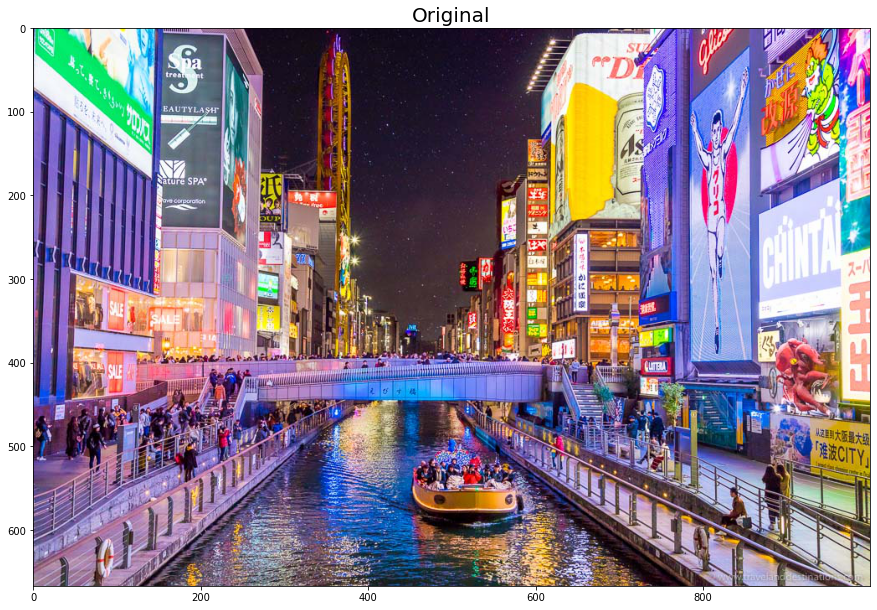

(1000, 667)


In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.title("Original",fontsize=20)
plt.imshow(img)
plt.show()
print(img.size)

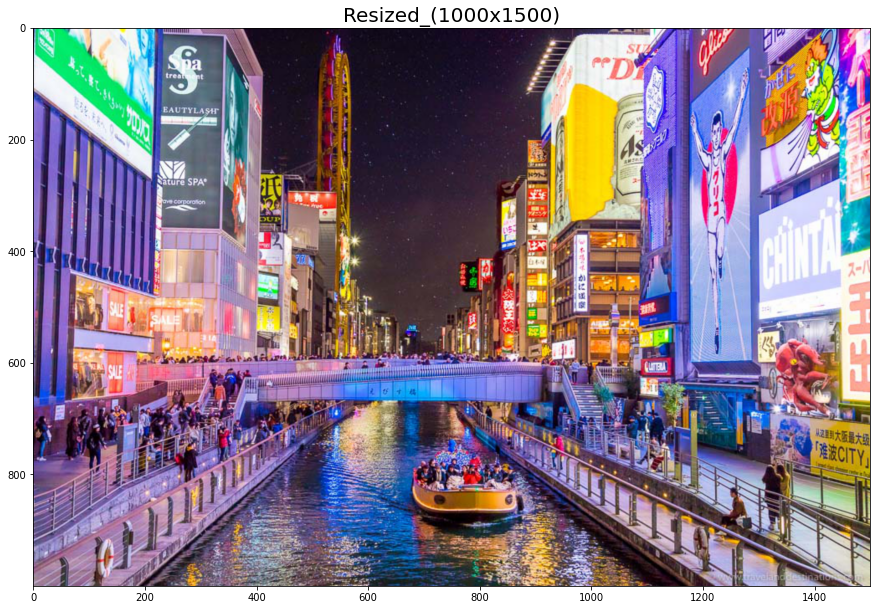

In [67]:
size=(1000,1500)
#Bilinear resize method is chosen
re = tf.image.resize(
    img, size, method=tf.image.ResizeMethod.BILINEAR, preserve_aspect_ratio=False,
    antialias=False, name=None
)
#Resize returns float value
re=re.numpy().astype('uint8')

plt.figure(figsize=(15,15))
plt.title("Resized_(1000x1500)",fontsize=20)
plt.imshow(re)
plt.show()

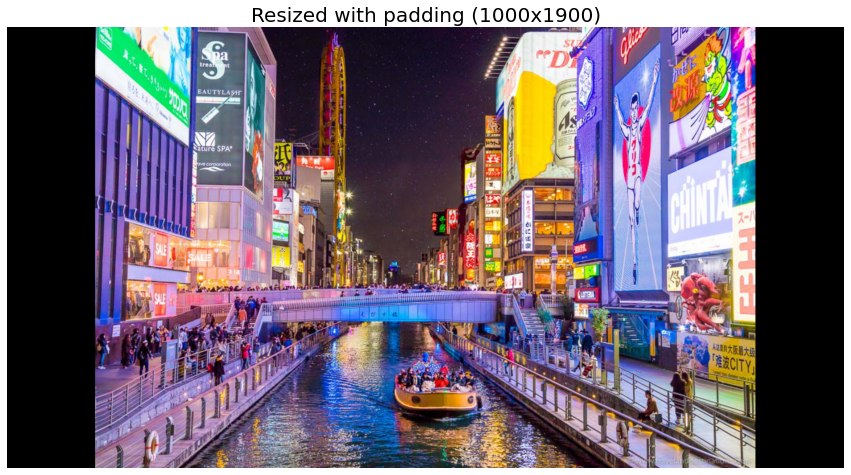

In [165]:
size=[1000,1900]

# Padding keeps the aspect ratio intact while padding
re= tf.image.resize_with_pad(
    img, size[0], size[1], method=tf.image.ResizeMethod.BILINEAR,
    antialias=False
)

re = re.numpy().astype('uint8')
plt.figure(figsize=(15,15))
plt.axis('off')
plt.title("Resized with padding (1000x1900)",fontsize=20)
plt.imshow(re)
plt.show()

# Colorspace Conversions

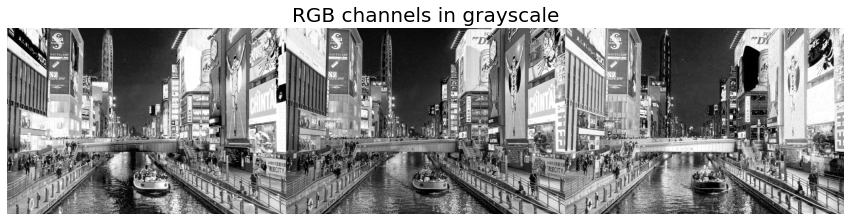

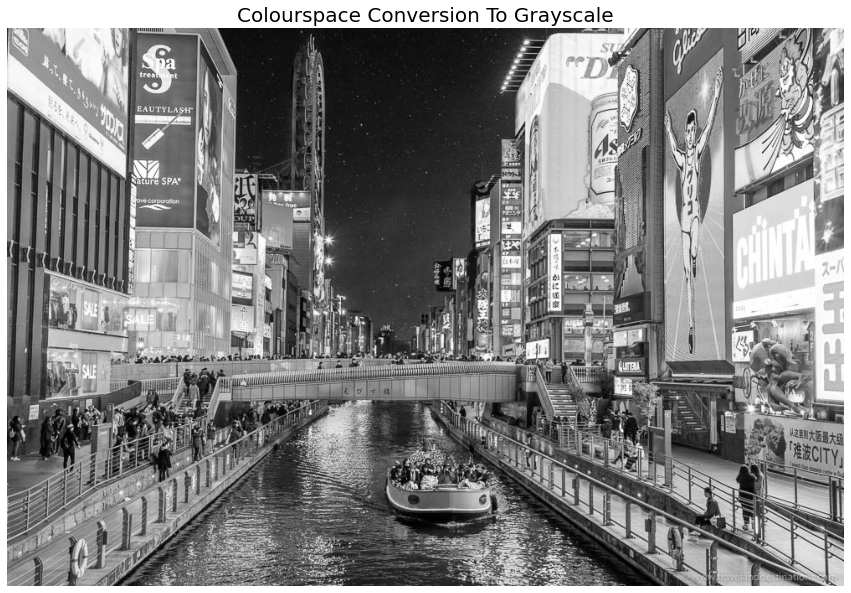

In [175]:
# R,G and B channels are split
re=tf.concat([np.array(img)[:,:,0],np.array(img)[:,:,1],np.array(img)[:,:,2]],axis=1)

plt.figure(figsize=(15,15))
plt.title("RGB channels in grayscale",fontsize=20)
plt.axis('off')
plt.imshow(re,"gray")
plt.show()

# Colourspace conversion
re= tf.image.rgb_to_grayscale(
    img, name=None
)
#re = re.numpy().astype('uint8')
plt.figure(figsize=(15,15))
plt.title("Colourspace Conversion To Grayscale",fontsize=20)
plt.axis('off')
plt.imshow(re,"gray")
plt.show()

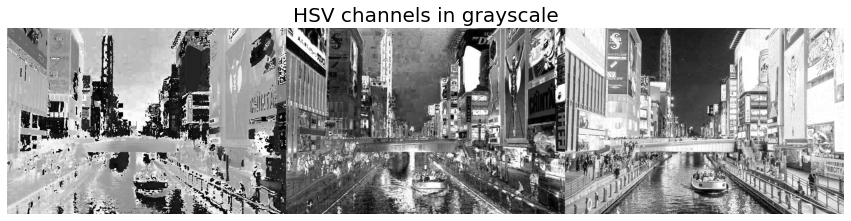

In [241]:
re= tf.image.rgb_to_hsv(
    img, name=None
)
#H,S and V channels are split and plotted
re_ch=tf.concat([np.array(re)[:,:,0]*255,np.array(re)[:,:,1]*255,np.array(re)[:,:,2]],axis=1)

plt.figure(figsize=(15,15))
plt.title("HSV channels in grayscale",fontsize=20)
plt.axis('off')
plt.imshow(re_ch,"gray")
plt.show()


# Grayscale Gradient Computation

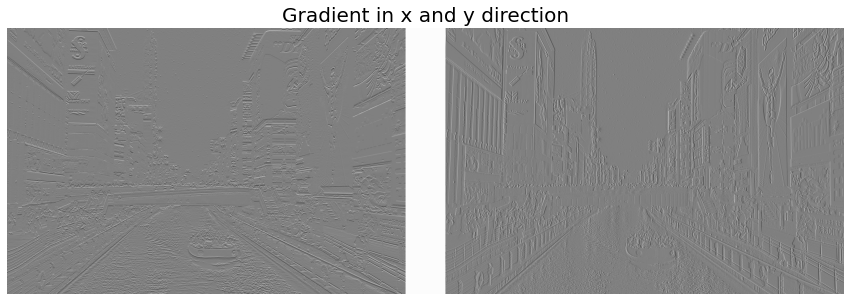

In [199]:
import numpy as np

#Grey Scale Conversion
re= tf.image.rgb_to_grayscale(
    img, name=None
)

#Reshaping Tensor to 4D format [batch-size,width,height,depth]
grad = tf.constant([np.array(re)])
rex,rey= tf.image.image_gradients(
    grad)
space = np.zeros(rex[0].shape)
plt.figure(figsize=(15,15))
plt.title("Gradient in x and y direction",fontsize=20)
plt.axis('off')
plt.imshow(tf.concat([rex[0],space[:,0:100,:]+200,rey[0]],axis=1),"gray")
plt.show()


# Data Augmentation

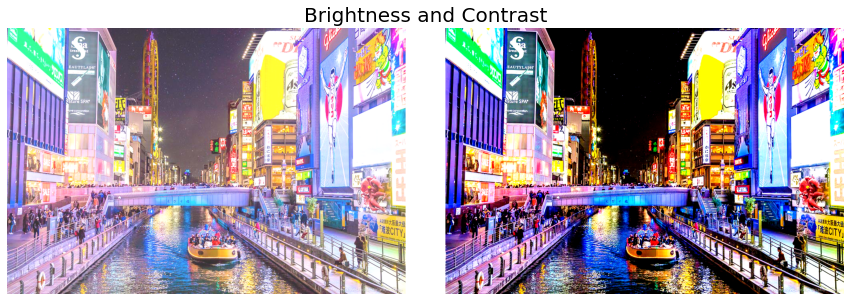

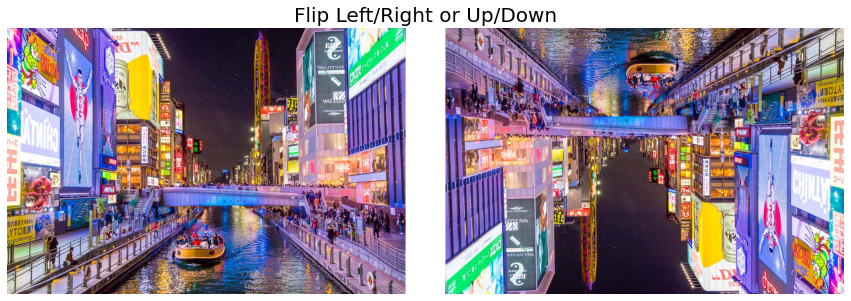

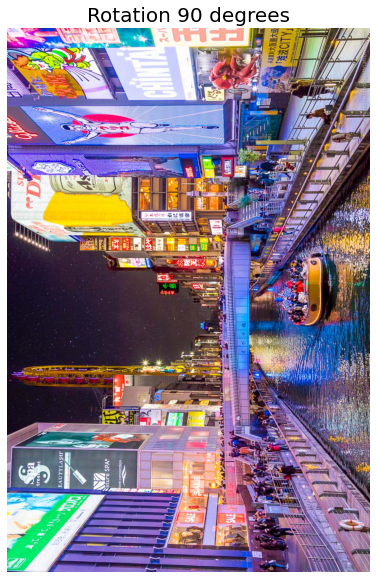

In [209]:
# Brightness and Contrast functions
re_b = tf.image.adjust_brightness(
    img, delta=0.2
)
re_c = tf.image.adjust_contrast(
    img, contrast_factor=2
)
space = np.zeros(re_c.shape)

plt.figure(figsize=(15,15))
plt.title("Brightness and Contrast",fontsize=20)
plt.axis('off')
plt.imshow(tf.concat([re_b,space[:,0:100,:]+255,re_c],axis=1))
plt.show()

# Fliping and Rotation
re_lr=tf.image.flip_left_right(
    img
)

re_ud=tf.image.flip_up_down(
    img
)
plt.figure(figsize=(15,15))
plt.imshow(tf.concat([re_lr,space[:,0:100,:]+255,re_ud],axis=1))
plt.title("Flip Left/Right or Up/Down",fontsize=20)
plt.axis('off')
plt.show()

re_rot=tf.image.rot90(
    img
)
plt.figure(figsize=(10,10))
plt.title("Rotation 90 degrees",fontsize=20)
plt.axis('off')
plt.imshow(re_rot)
plt.show()